<a href="https://colab.research.google.com/github/TRANTHITHUYTIEN20104061/Tr-n-Th-Th-y-Ti-n-20104061/blob/main/ND_hoa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:

import numpy as np 
import pandas as pd 
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
import matplotlib.pyplot as plt
%matplotlib inline
import pathlib 
from glob import glob
from tensorflow.keras.utils import image_dataset_from_directory
import warnings

In [23]:
import os

labels = os.listdir("/content/drive/MyDrive/Colab Notebooks/BTND/flowers")
labels

['tulip', 'Hoa cuc', 'Bo cong anh', 'Hoa hong', 'Hoa huong duong']

In [24]:
tulip_data = plt.imread('/content/drive/MyDrive/Colab Notebooks/BTND/flowers/tulip/100930342_92e8746431_n.jpg')
tulip_data
tulip_data.shape

(209, 320, 3)

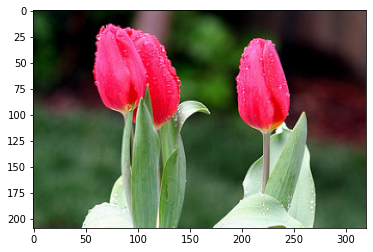

In [25]:
import matplotlib.pyplot as plt
plt.imshow(plt.imread('/content/drive/MyDrive/Colab Notebooks/BTND/flowers/tulip/100930342_92e8746431_n.jpg'))


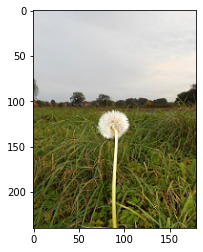

In [26]:
import matplotlib.pyplot as plt
plt.imshow(plt.imread('/content/drive/MyDrive/Colab Notebooks/BTND/flowers/Bo cong anh/10294487385_92a0676c7d_m.jpg'))


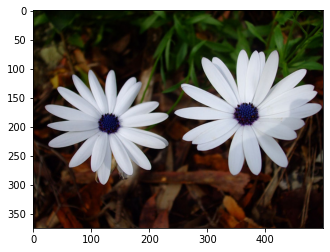

In [27]:
import matplotlib.pyplot as plt
plt.imshow(plt.imread('/content/drive/MyDrive/Colab Notebooks/BTND/flowers/Hoa cuc/1265350143_6e2b276ec9.jpg'))

In [28]:

path = '/content/drive/MyDrive/Colab Notebooks/BTND/flowers'
data_dir = pathlib.Path(path)
data_dir

PosixPath('/content/drive/MyDrive/Colab Notebooks/BTND/flowers')

In [29]:
import cv2
def read_image(path):
    image = cv2.imread(path, cv2.IMREAD_COLOR)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image
path

'/content/drive/MyDrive/Colab Notebooks/BTND/flowers'

In [30]:
labels = ['Bo cong anh', 'Hoa cuc', 'hoa huong duong', 'tulip', 'Hoa hong']
col_to_title = {'Bo cong anh': 'Bo cong anh', 'Hoa cuc': 'Hoa cuc', 'hoa huong duong': 'hoa huong duong', 'tulip': 'tulip','Hoa hong': 'Hoa hong'}

In [31]:
flowers_folder = '/content/drive/MyDrive/Colab Notebooks/BTND/flowers'
flowers_folder

'/content/drive/MyDrive/Colab Notebooks/BTND/flowers'

In [32]:
x_train = image_dataset_from_directory(flowers_folder,validation_split=0.3,subset="validation",seed=2210,image_size=(128,128),batch_size=32)
x_test = image_dataset_from_directory(flowers_folder,validation_split=0.3,subset="validation",seed=2210,image_size=(128,128),batch_size=32)

Found 4327 files belonging to 5 classes.
Using 1298 files for validation.
Found 4327 files belonging to 5 classes.
Using 1298 files for validation.


In [33]:
class_name=x_train.class_names
class_name

['Bo cong anh', 'Hoa cuc', 'Hoa hong', 'Hoa huong duong', 'tulip']

In [34]:
import tensorflow as tf 

AUTOTUNE = tf.data.AUTOTUNE
x_train = x_train.cache().shuffle(buffer_size=1000).prefetch(buffer_size=AUTOTUNE)
x_test = x_test.cache().shuffle(buffer_size=1000).prefetch(buffer_size=AUTOTUNE)

In [35]:
data_layer=Sequential([layers.RandomFlip(mode='horizontal',input_shape=(128,128,3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
    layers.RandomContrast(0.1)],name='data_layer')
num_classes=len(class_name)
num_classes

5

In [36]:
model=Sequential([ data_layer,
    layers.Conv2D(filters=16, kernel_size=(3,3), padding='same', activation='relu'),
    layers.MaxPooling2D(),
    
    layers.Conv2D(filters=32,kernel_size=3,padding="same", activation="relu"),
    layers.MaxPooling2D(),
    
    layers.Conv2D(filters=64, kernel_size=3, padding="same", activation="relu"),
    layers.MaxPooling2D(),
    
    layers.Dropout(rate=0.2),
    layers.Flatten(),
    
    layers.Dense(units=128, activation="relu"),
    layers.Dense(units=num_classes)])

In [37]:
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=["accuracy"])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 data_layer (Sequential)     (None, 128, 128, 3)       0         
                                                                 
 conv2d_6 (Conv2D)           (None, 128, 128, 16)      448       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 64, 64, 16)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 64, 64, 32)        4640      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 32, 32, 32)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 32, 32, 64)       

In [43]:
history = model.fit(x = x_train, epochs = 100, validation_data = x_test)

Epoch 1/100
41/41 [==============================] - 5s 129ms/step - loss: 0.4615 - accuracy: 0.8328 - val_loss: 0.3558 - val_accuracy: 0.8806
Epoch 2/100
41/41 [==============================] - 5s 128ms/step - loss: 0.4639 - accuracy: 0.8274 - val_loss: 0.3924 - val_accuracy: 0.8498
Epoch 3/100
41/41 [==============================] - 5s 128ms/step - loss: 0.4433 - accuracy: 0.8367 - val_loss: 0.3946 - val_accuracy: 0.8644
Epoch 4/100
41/41 [==============================] - 5s 127ms/step - loss: 0.4487 - accuracy: 0.8282 - val_loss: 0.3515 - val_accuracy: 0.8783
Epoch 5/100
41/41 [==============================] - 5s 128ms/step - loss: 0.4140 - accuracy: 0.8436 - val_loss: 0.3239 - val_accuracy: 0.8829
Epoch 6/100
41/41 [==============================] - 5s 129ms/step - loss: 0.3857 - accuracy: 0.8552 - val_loss: 0.2754 - val_accuracy: 0.9052
Epoch 7/100
41/41 [==============================] - 5s 129ms/step - loss: 0.4108 - accuracy: 0.8436 - val_loss: 0.2713 - val_accuracy: 0.9060

1/1 [==============================] - 0s 16ms/step


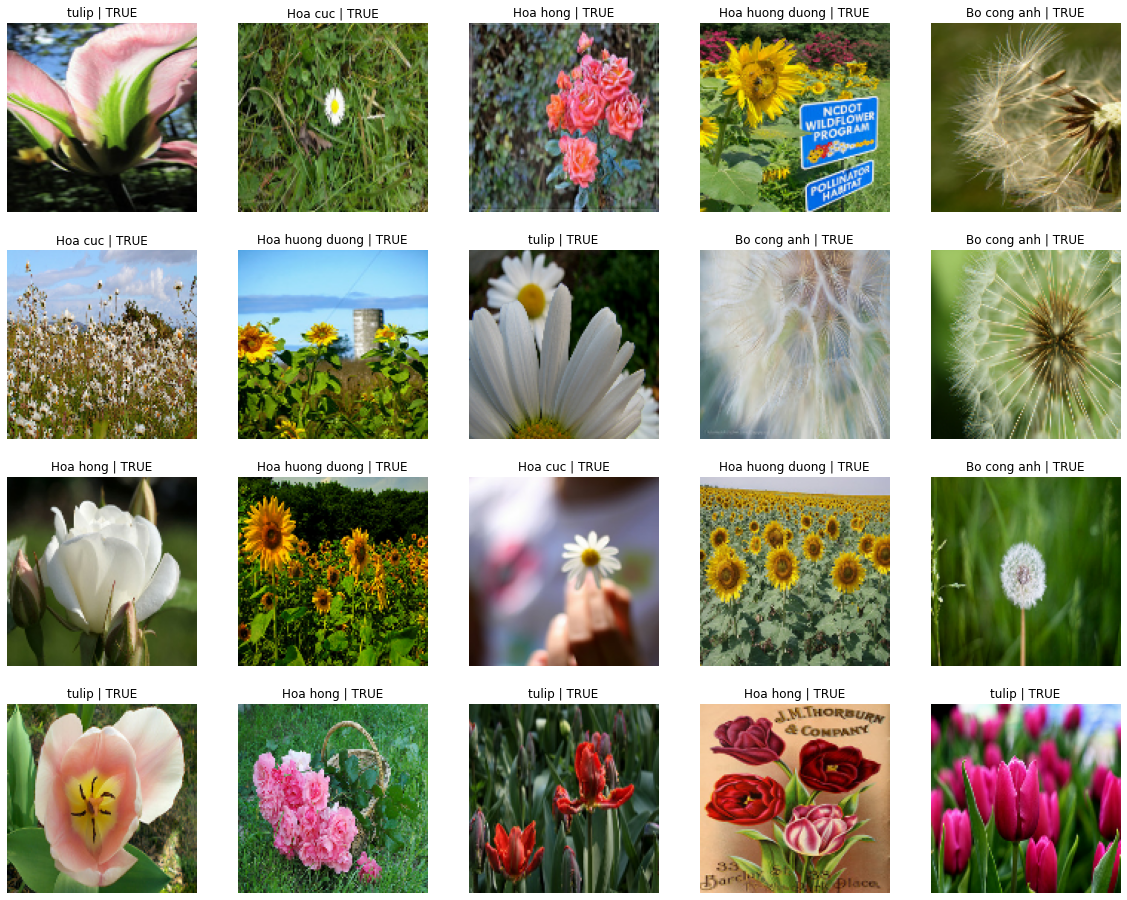

In [51]:
plt.figure(figsize=(20, 16))
class_names = ['Bo cong anh', 'Hoa cuc','Hoa hong',  'Hoa huong duong', 'tulip']
for images, labels in x_test.take(1):
    for i in range(20):
        ax = plt.subplot(4, 5, i + 1)
        img = images[i].numpy().astype("uint8")
        img = tf.expand_dims(img, axis=0)
        predictions = model.predict(img)
        predicted_class = np.argmax(predictions)
        if class_names[predicted_class] == class_names[labels[i]]:
            result = ' | TRUE'   
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[predicted_class]+result)
        plt.axis("off")